In [1]:
from lib.envs.blackjack import BlackjackEnv
from lib import plotting
import sys
from collections import defaultdict
import matplotlib

matplotlib.style.use('ggplot')

In [2]:
env = BlackjackEnv()


In [3]:
def print_observation(observation):
    score, dealer_score, usable_ace = observation
    print(f"玩家分數: {score} (是否持有A: {usable_ace}), 莊家分數: {dealer_score}")

def strategy(observation):
    score, dealer_score, usable_ace = observation
    return 0 if score >= 20 else 1

for i in range(20):
    observation = env.reset()
    for t in range(100):
        print_observation(observation)
        action = strategy(observation)
        print(f'行動: {["不補牌", "補牌"][action]}')
        observation, reward, done, _ = env.step(action)
        if done:
            print_observation(observation)
            print(f"輸贏分數: {reward}\n")
            break

玩家分數: 12 (是否持有A: False), 莊家分數: 7
行動: 補牌
玩家分數: 14 (是否持有A: False), 莊家分數: 7
行動: 補牌
玩家分數: 22 (是否持有A: False), 莊家分數: 7
輸贏分數: -1

玩家分數: 19 (是否持有A: False), 莊家分數: 8
行動: 補牌
玩家分數: 21 (是否持有A: False), 莊家分數: 8
行動: 不補牌
玩家分數: 21 (是否持有A: False), 莊家分數: 8
輸贏分數: 1

玩家分數: 19 (是否持有A: True), 莊家分數: 8
行動: 補牌
玩家分數: 19 (是否持有A: False), 莊家分數: 8
行動: 補牌
玩家分數: 20 (是否持有A: False), 莊家分數: 8
行動: 不補牌
玩家分數: 20 (是否持有A: False), 莊家分數: 8
輸贏分數: 1

玩家分數: 20 (是否持有A: False), 莊家分數: 4
行動: 不補牌
玩家分數: 20 (是否持有A: False), 莊家分數: 4
輸贏分數: 1

玩家分數: 18 (是否持有A: False), 莊家分數: 6
行動: 補牌
玩家分數: 19 (是否持有A: False), 莊家分數: 6
行動: 補牌
玩家分數: 24 (是否持有A: False), 莊家分數: 6
輸贏分數: -1

玩家分數: 20 (是否持有A: False), 莊家分數: 3
行動: 不補牌
玩家分數: 20 (是否持有A: False), 莊家分數: 3
輸贏分數: 1

玩家分數: 21 (是否持有A: False), 莊家分數: 10
行動: 不補牌
玩家分數: 21 (是否持有A: False), 莊家分數: 10
輸贏分數: 1

玩家分數: 17 (是否持有A: False), 莊家分數: 10
行動: 補牌
玩家分數: 18 (是否持有A: False), 莊家分數: 10
行動: 補牌
玩家分數: 26 (是否持有A: False), 莊家分數: 10
輸贏分數: -1

玩家分數: 21 (是否持有A: True), 莊家分數: 8
行動: 不補牌
玩家分數: 21 (是否持有A: True), 莊家分數: 8
輸贏分數: 1

玩家分數: 17 (是

In [8]:
def policy_eval(policy, env, num_episodes, discount_factor = 1.0):
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    V = defaultdict(float)
    
    for i in range(1, num_episodes + 1):
        if i % 1000 == 0:
            print(f'\r {i} / {num_episodes}回合', end = '')
            sys.stdin.flush()
            
        episode = []
        state = env.reset()
        for t in range(100):
            action = policy(state)
            next_state, reward, done, _ = env.step(action)
            episode.append((state, action, reward))
            if done:
                break
            state = next_state
        states_in_episode = set([tuple(x[0]) for x in episode])
        for state in states_in_episode:
            first_occurence_idx = next(i for i, x in enumerate(episode) if x[0] == state)
            G = sum([x[2] * (discount_factor ** i) for i, x in enumerate(episode[first_occurence_idx:])])
            returns_sum[state] += G
            returns_count[state] += 1.
            V[state] = returns_sum[state] / returns_count[state]
    return V

In [9]:
def sample_policy(observation):
    score, dealer_score, usable_ace = observation# 超過20點，不補牌(stick)，否則都跟莊家要一張牌(hit)
    return 0 if score >= 20 else 1

 10000 / 10000回合

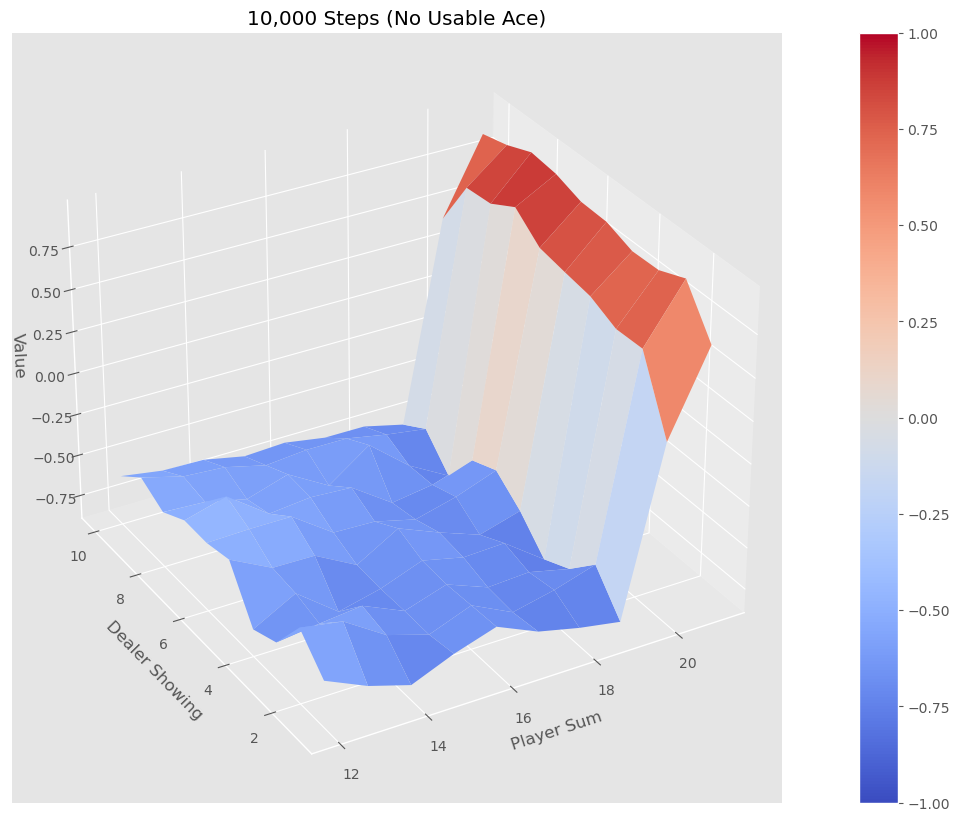

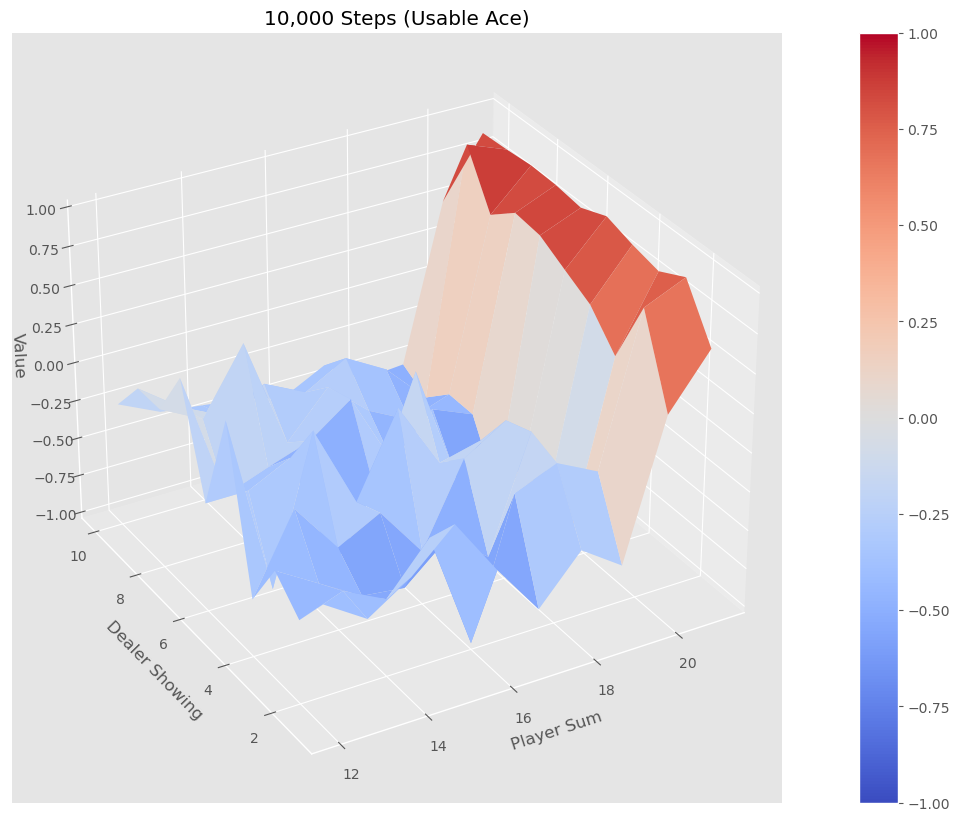

 500000 / 500000回合

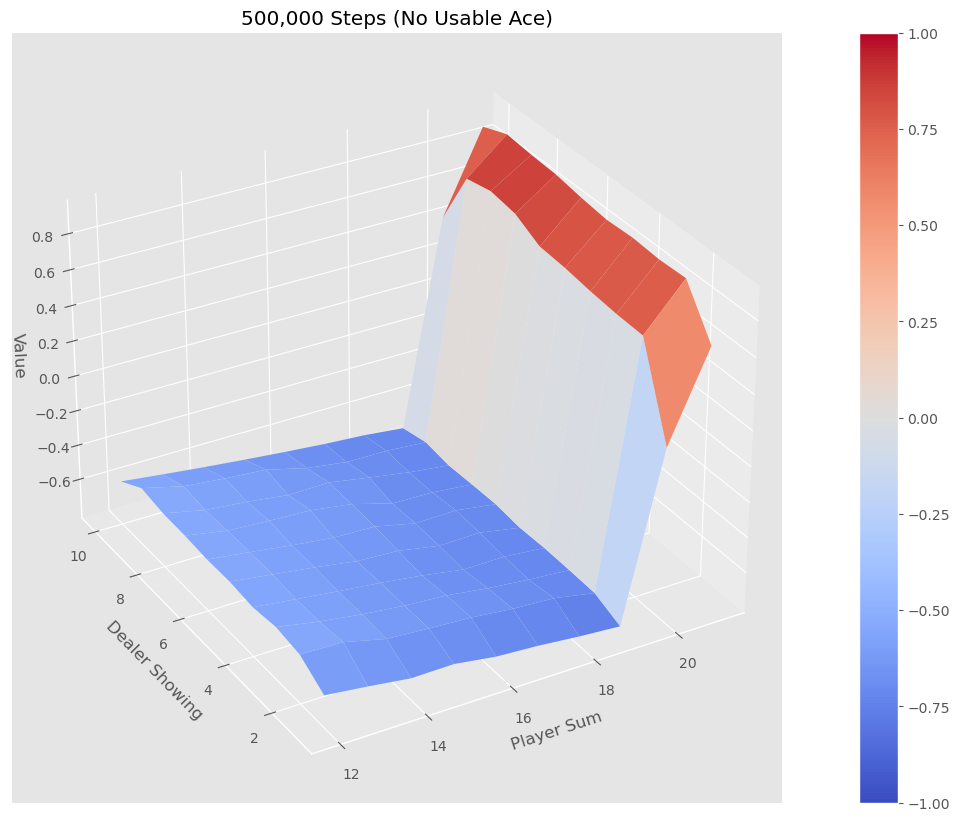

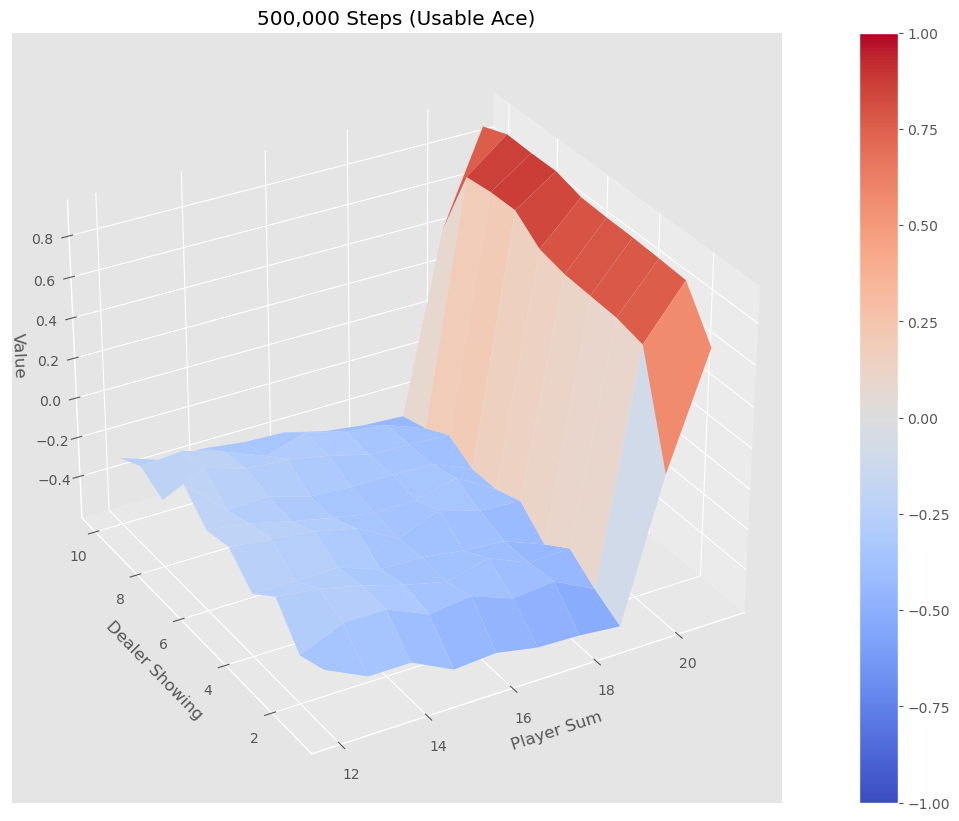

In [11]:
V_10k = policy_eval(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Steps")
V_500k = policy_eval(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500,000 Steps")